In [2]:
import numpy as np

x_data = np.array([1, 2, 3, 4, 5]).reshape(5,1)
t_data = np.array([2, 3, 5, 4, 7]).reshape(5,1) 

# raw_data = [ [1, 2], [2, 3], [3, 4], [4, 5], [5, 6] ]

print("x_data.shape = ", x_data.shape, ", t_data.shape = ", t_data.shape)

x_data.shape =  (5, 1) , t_data.shape =  (5, 1)


In [3]:
W = np.random.rand(1,1)  
b = np.random.rand(1)  
print("W = ", W, ", W.shape = ", W.shape, ", b = ", b, ", b.shape = ", b.shape)

W =  [[0.19987087]] , W.shape =  (1, 1) , b =  [0.01090246] , b.shape =  (1,)


In [4]:
def loss_func(x, t):
    y = np.dot(x,W) + b
    
    return ( np.sum( (t - y)**2 ) ) / ( len(x) )

In [5]:
def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

In [6]:
# 손실함수 값 계산 함수
# 입력변수 x, t : numpy type
def error_val(x, t):
    y = np.dot(x,W) + b
    
    return ( np.sum( (t - y)**2 ) ) / ( len(x) )

# 학습을 마친 후, 임의의 데이터에 대해 미래 값 예측 함수
# 입력변수 x : numpy type
def predict(x):
    y = np.dot(x,W) + b
    
    return y

In [7]:
learning_rate = 1e-2  # 발산하는 경우, 1e-3 ~ 1e-6 등으로 바꾸어서 실행

f = lambda x : loss_func(x_data,t_data)

print("Initial error value = ", error_val(x_data, t_data), "Initial W = ", W, "\n", ", b = ", b )

for step in  range(8001):  
    
    W -= learning_rate * numerical_derivative(f, W)
    
    b -= learning_rate * numerical_derivative(f, b)
    
    if (step % 400 == 0):
        print("step = ", step, "error value = ", error_val(x_data, t_data), "W = ", W, ", b = ",b )

Initial error value =  15.044867072320153 Initial W =  [[0.19987087]] 
 , b =  [0.01090246]
step =  0 error value =  9.102688899557092 W =  [[0.45124513]] , b =  [0.0676097]
step =  400 error value =  0.5449538075047643 W =  [[1.14570527]] , b =  [0.73502985]
step =  800 error value =  0.5403160822055824 W =  [[1.11154507]] , b =  [0.85832882]
step =  1200 error value =  0.5400201679133861 W =  [[1.10291627]] , b =  [0.88947393]
step =  1600 error value =  0.540001286832106 W =  [[1.10073664]] , b =  [0.89734113]
step =  2000 error value =  0.5400000821074962 W =  [[1.10018608]] , b =  [0.89932837]
step =  2400 error value =  0.5400000052389436 W =  [[1.100047]] , b =  [0.89983035]
step =  2800 error value =  0.5400000003342755 W =  [[1.10001187]] , b =  [0.89995715]
step =  3200 error value =  0.5400000000213288 W =  [[1.100003]] , b =  [0.89998918]
step =  3600 error value =  0.540000000001361 W =  [[1.10000076]] , b =  [0.89999727]
step =  4000 error value =  0.5400000000000869 W = 

In [8]:
predict(43) 

array([[48.2]])

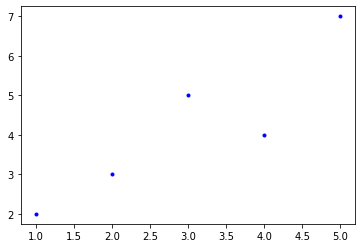

In [9]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


#pyplot.plot(x_data,t_data)
#pyplot.plot(solutions, scores, '.-', color='red')
plt.plot(x_data,t_data, "b.")
plt.show()

C:\Users\jungs\AppData\Local\Temp\ipykernel_27520\1474583665.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  theta_best = np.array([W,b])


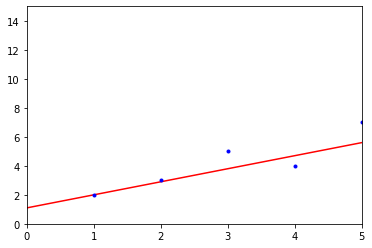

In [10]:
X_new = np.array([[0], [5]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.array([W,b])
y_predict = X_new_b.dot(theta_best)
y_predict

plt.plot(X_new, y_predict, "r-")
plt.plot(x_data,t_data, "b.")
plt.axis([0, 5, 0, 15])
plt.show()